# Assignment 2
In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification.


## Note - Dont forget to comment out the %matplotlib functions and import matplotlib lines and any call to the plot functions, Its better to comment out all the poltting fucntion used

## if you dont do that, the grader will always show you an error

### And also , there is a note in Question 2, once go through it

## Part 1 - Regression
First, run the following block to set up the variables needed for later sections.

<IPython.core.display.Javascript object>


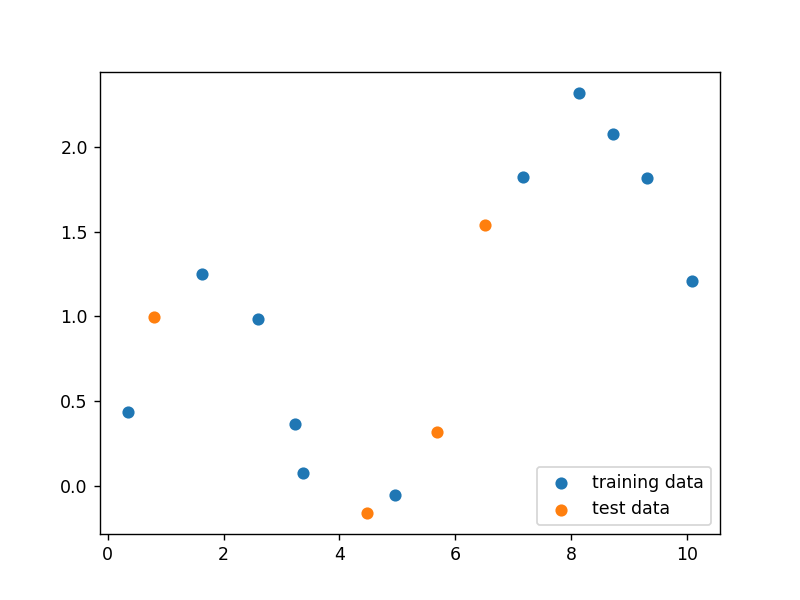

In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
    
# NOTE: Uncomment the function below to visualize the data, but be sure 
# to **re-comment it before submitting this assignment to the autograder**.   
part1_scatter()

## Question 1
Question 1
Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. np.linspace(0,10,100)) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.



The figure above shows the fitted models plotted on top of the original data (using plot_one()).


This function should return a numpy array with shape (4, 100)

In [80]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
#first step starts with creating an array with values bretween (1,10) using linspace which is also given above
    
    input_array = np.linspace(0,10,100)

#We will create a new training data (X_train1) , with required shape (-1,1) which must be given for the polynonmial feature
#and also because, we will have the need of X_train for the next questions
    X_train1 = X_train.reshape(-1,1)

# I just created a 'predicted array' with a shape (4,100)
# here, it is created with dtype ='f8' which is float type because, if it is created initially with integers, then even, if 
#we add float values to it, it will append them as int(that float number)
#thats why, it is initially created as a float type array
    predicted_array = np.arange(400,dtype='f8').reshape(4,100)
    
# list of degrees that can be used for iteration
    degree=[1,3,6,9]
    
    for x in range(4):
        
#Now for each loop, we will create a new training data 'Xtrain_2' using 'X_train1' based on degree of each iteration
        Xtrain_2 = PolynomialFeatures(degree=degree[x]).fit_transform(X_train1)
    
#Now, we create a regressor that trains over 'Xtrain_2' and 'y_train'
        linreg = LinearRegression().fit(Xtrain_2,y_train)
    
#now, we will predict the result of each regression using '.predict' method of the regerssor and the iput for that regressor wil
#be the polynonial featured data set for 'input_array'
#here each row will be assigned with the predicted values of each degree
        predicted_array[x] = linreg.predict(PolynomialFeatures(degree=degree[x]).fit_transform(input_array.reshape(-1,1)))
        
    
    return predicted_array
answer_one()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

<IPython.core.display.Javascript object>


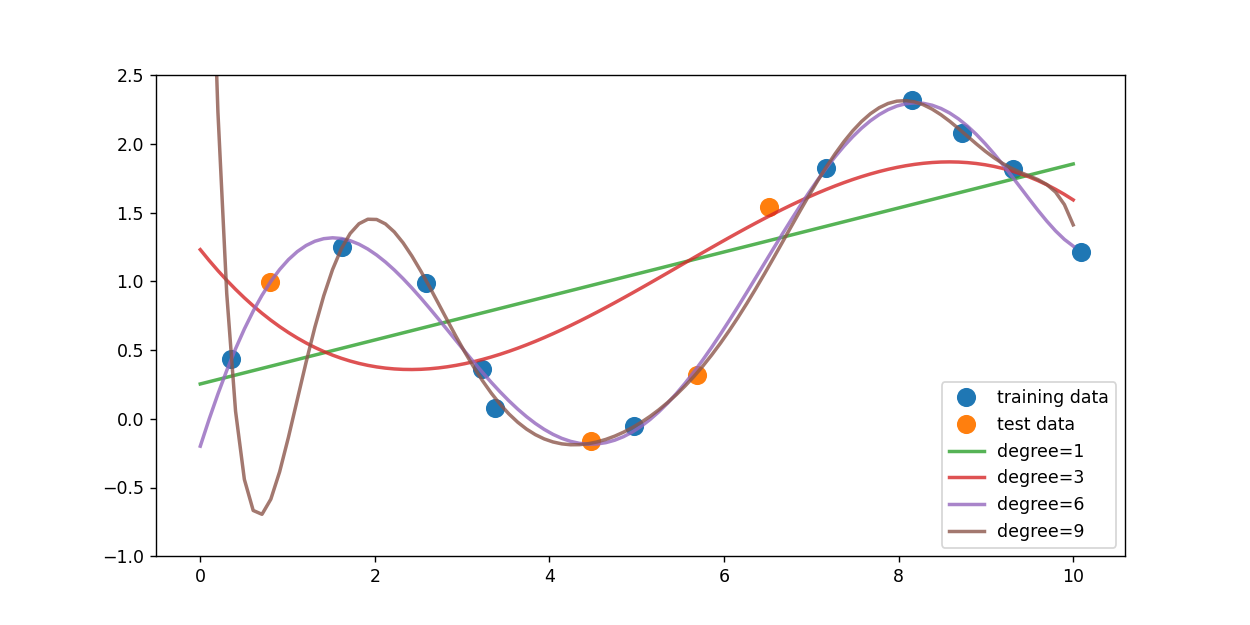

In [81]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

## Question 2
Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees 0 through 9. For each model compute the  R2R2  (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

This function should return one tuple of numpy arrays (r2_train, r2_test). Both arrays should have shape (10,)

In [82]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score
    
#create empty lists for r2_train and r2_test    
    r2_train = []
    r2_test = []
    
#then, create new data sets based on X_train and X_test with the required shape of only one column
    X_train1 = X_train.reshape(-1,1)
    X_test1 = X_test.reshape(-1,1)
    
    for x in range(10):

#Now, create polynomial featured datasets from X_train1, X_test1 which is used to build a regressor
        X_train2 = PolynomialFeatures(degree=x).fit_transform(X_train1)
        X_test2 = PolynomialFeatures(degree=x).fit_transform(X_test1)
        
#Now, train the regressor with the above obtained polynomial featured training data set
        linreg = LinearRegression().fit(X_train2,y_train)
    
        y_predicted_train = linreg.predict(X_train2)
        y_predicted_test = linreg.predict(X_test2)
    
#Now, now append the scores of training and testing data sets into the respective lists
        r2_train.append(r2_score(y_train,y_predicted_train))
        r2_test.append(r2_score(y_test,y_predicted_test))

#Now, convert the lists into arrays of required shape(10,1)
#Note - in this question, it is asked to make the shape of array as (10,1) but auto grader is making it correct only, if you
#reshape it as (1,10)

    r2_train = np.array(r2_train).reshape(10,1)
    r2_test = np.array(r2_test).reshape(10,1)

    # Your code here
    ans = tuple([r2_train,r2_test])

    return ans
answer_two()

(array([[0.        ],
        [0.42924578],
        [0.4510998 ],
        [0.58719954],
        [0.91941945],
        [0.97578641],
        [0.99018233],
        [0.99352509],
        [0.99637545],
        [0.99803706]]),
 array([[-0.47808642],
        [-0.45237104],
        [-0.06856984],
        [ 0.00533105],
        [ 0.73004943],
        [ 0.87708301],
        [ 0.9214094 ],
        [ 0.92021504],
        [ 0.6324795 ],
        [-0.64524777]]))

## Question 3
Based on the  R2R2  scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset?

Hint: Try plotting the  R2R2  scores from question 2 to visualize the relationship between degree level and  R2R2 . Remember to comment out the import matplotlib line before submission.

This function should return one tuple with the degree values in this order: (Underfitting, Overfitting, Good_Generalization). There might be multiple correct solutions, however, you only need to return one possible solution, for example, (1,2,3).

<IPython.core.display.Javascript object>


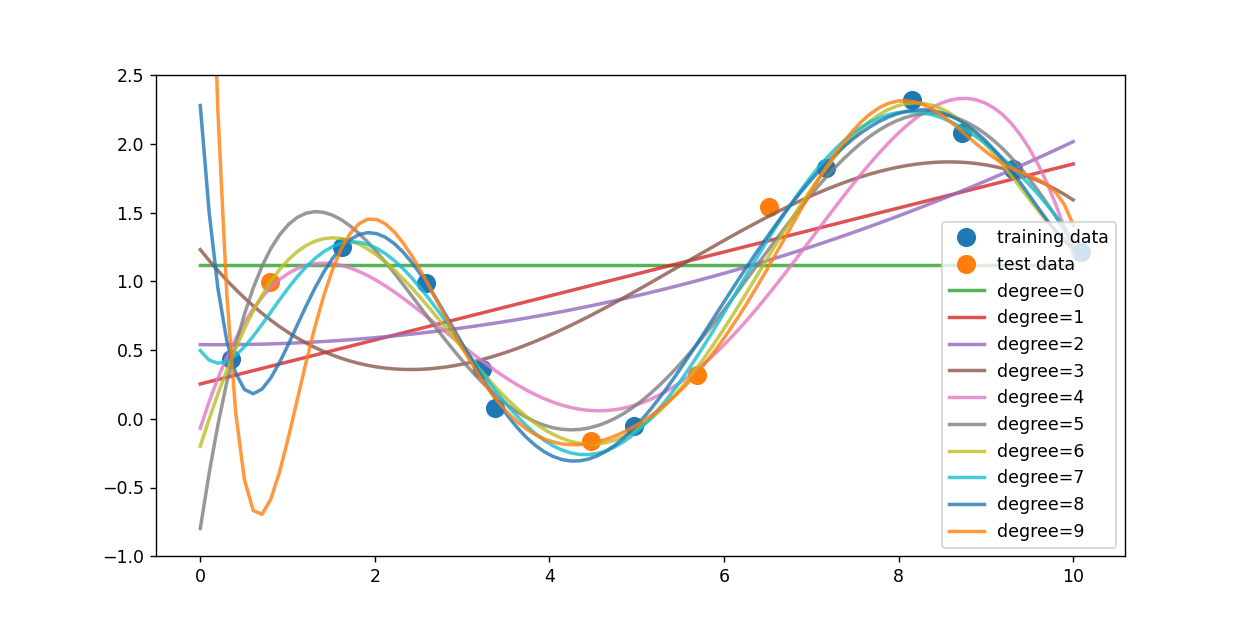

In [83]:
# To plot the models of degree 0 - 9, I just slighlty modified the function 'plot_one' that was used by them to plot the graph 
#in the first question

def answer_trail_3():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    array = np.linspace(0,10,100)

    X_train1 = X_train.reshape(-1,1)

    predicted_array = np.arange(1000,dtype='f8').reshape(10,100)
    degree=[1,3,6,9]
    
    for x in range(10):
        Xtrain_2 = PolynomialFeatures(degree=x).fit_transform(X_train1)
        linreg = LinearRegression().fit(Xtrain_2,y_train)
        predicted_array[x] = linreg.predict(PolynomialFeatures(degree=x).fit_transform(array.reshape(-1,1)))
    
    return predicted_array

# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([0,1,2,3,4,5,6,7,8,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_trail_3())


In [84]:
def answer_three():
    
#We have the accuracies of the training data and testing data from the question 2
#So, An overfitting model is the one which performs excellent only on training data and fails on tesitng data, so I think
# degree = 9 is the overfitting model
#next, underfititng modle is the one with least accuracy on the training data, so I think degree = 0 is the correct answer,

#Next, for the good generalized model, I think, getting a good score over testing data and a decent score on training data,
#Keeping this in mind, I think degree = 7 fits the best.
    ans = tuple(0,9,7)

    return ans

## Question 4
Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters alpha=0.01, max_iter=10000) both on polynomial features of degree 12. Return the  R2R2  score for both the LinearRegression and Lasso model's test sets.

This function should return one tuple (LinearRegression_R2_test_score, Lasso_R2_test_score)

In [85]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics.regression import r2_score
    
#first, create training data set and training data set based on the degree given
    X_train1 = PolynomialFeatures(degree = 12).fit_transform(X_train.reshape(-1,1))
    X_train2 = PolynomialFeatures(degree = 12).fit_transform(X_test.reshape(-1,1))
    
#Then create the regeressor's
    LinearRegressor = LinearRegression().fit(X_train1,y_train)
    LassoRegressor = Lasso(alpha = 0.01, max_iter = 10000).fit(X_train1,y_train)
    
#now, find the predicted array of the training data, using the regressor's created
    Linear_predicted =  LinearRegressor.predict(X_train2)
    Lasso_predicted = LassoRegressor.predict(X_train2)
    
#Now, find the r^2 score of the predicted data sets using the r2_score method    
    LinearRegression_R2_test_score = r2_score(y_test,Linear_predicted)
    Lasso_R2_test_score = r2_score(y_test,Lasso_predicted)

    # Your code here
    ans = tuple([LinearRegression_R2_test_score, Lasso_R2_test_score])
    
    return ans

answer_four()

C:\Users\tanuj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3556421695889839, tolerance: 0.00068949825403828
  model = cd_fast.enet_coordinate_descent(


(-4.311980555741178, 0.8406625614750356)

## Part 2 - Classification
Here's an application of machine learning that could save your life! For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `readonly/mushrooms.csv`. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables. 

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in Questions 6 and 7, we will create a smaller version of the
# entire mushroom dataset for use in those questions.  For simplicity we'll just re-use
# the 25% test split created above as the representative subset.
#
# Use the variables X_subset, y_subset for Questions 6 and 7.
X_subset = X_test2
y_subset = y_test2

## Question 5
Using X_train2 and y_train2 from the preceeding cell, train a DecisionTreeClassifier with default parameters and random_state=0. What are the 5 most important features found by the decision tree?

As a reminder, the feature names are available in the X_train2.columns property, and the order of the features in X_train2.columns matches the order of the feature importance values in the classifier's feature_importances_ property.

This function should return a list of length 5 containing the feature names in descending order of importance.

Note: remember that you also need to set random_state in the DecisionTreeClassifier.

In [87]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier

#First, creat a classifer using the given data sets X_train and y_train2
    classifier = DecisionTreeClassifier(random_state = 0).fit(X_train2, y_train2)
    
#then, using the feature_importance attribute, create a list of those feature importances,sort them and collect the top 5 of them
    features_list = list(classifier.feature_importances_)
    features_list.sort(reverse=True)
    top_5_features_num_list = features_list[:5]
    
#then, find those index positions, where the top 5 featueres are in the list
    index_pos_list = [list(classifier.feature_importances_).index(x) for x in top_5_features_num_list]
    
#then, find the name of the features from the .columns of the dataset X_train2
    top_5_features_list = [X_train2.columns[x] for x in index_pos_list]
    # Your code here

    return top_5_features_list
answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

## Question 6
For this question, we're going to use the validation_curve function in sklearn.model_selection to determine training and test scores for a Support Vector Classifier (SVC) with varying parameter values. Recall that the validation_curve function, in addition to taking an initialized unfitted classifier object, takes a dataset as input and does its own internal train-test splits to compute results.

Because creating a validation curve requires fitting multiple models, for performance reasons this question will use just a subset of the original mushroom dataset: please use the variables X_subset and y_subset as input to the validation curve function (instead of X_mush and y_mush) to reduce computation time.

The initialized unfitted classifier object we'll be using is a Support Vector Classifier with radial basis kernel. So your first step is to create an SVC object with default parameters (i.e. kernel='rbf', C=1) and random_state=0. Recall that the kernel width of the RBF kernel is controlled using the gamma parameter.

With this classifier, and the dataset in X_subset, y_subset, explore the effect of gamma on classifier accuracy by using the validation_curve function to find the training and test scores for 6 values of gamma from 0.0001 to 10 (i.e. np.logspace(-4,1,6)). Recall that you can specify what scoring metric you want validation_curve to use by setting the "scoring" parameter. In this case, we want to use "accuracy" as the scoring metric.

For each level of gamma, validation_curve will fit 3 models on different subsets of the data, returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets.

Find the mean score across the three models for each level of gamma for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

e.g.

if one of your array of scores is

array([[ 0.5,  0.4,  0.6],
       [ 0.7,  0.8,  0.7],
       [ 0.9,  0.8,  0.8],
       [ 0.8,  0.7,  0.8],
       [ 0.7,  0.6,  0.6],
       [ 0.4,  0.6,  0.5]])
it should then become

array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])
This function should return one tuple of numpy arrays (training_scores, test_scores) where each array in the tuple has shape (6,).



In [88]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve
    
#firstly, create a classifier using the given specifications    
    Classifier = SVC(kernel = 'rbf', C=1)
    
#then, use the validation_curve funciton to calculate the various scores of various data sets over various gamma values
    training_scores, testing_scores = validation_curve(Classifier,X_subset,y_subset,param_name = 'gamma',param_range = np.logspace(-4,1,6),cv = 3,scoring = 'accuracy')
    
#create empty lists to append the mean values of each of the possible outputs
    training_scores_mean = []
    testing_scores_mean = []
    
#iterate through the arrays, and append the mean values to the list
    for i in training_scores:
        training_scores_mean.append(np.mean(i))
    
    for i in testing_scores:
        testing_scores_mean.append(np.mean(i))
    
#now, convert them into numpy arrays and of required shape of (6,)
    testing_scores_mean = np.array(testing_scores_mean).reshape(6,)
    training_scores_mean = np.array(training_scores_mean).reshape(6,)
    
    final_tuple = tuple([training_scores_mean,testing_scores_mean])
    # Your code here

    
    return final_tuple

answer_six()

(array([0.56646972, 0.93106844, 0.990645  , 1.        , 1.        ,
        1.        ]),
 array([0.56720827, 0.9300837 , 0.98966027, 1.        , 0.99458395,
        0.52240276]))

In [89]:
print(np.logspace(-4,1,6))

[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01]


## Question 7
Based on the scores from question 6, what gamma value corresponds to a model that is underfitting (and has the worst test set accuracy)? What gamma value corresponds to a model that is overfitting (and has the worst test set accuracy)? What choice of gamma would be the best choice for a model with good generalization performance on this dataset (high accuracy on both training and test set)?

Hint: Try plotting the scores from question 6 to visualize the relationship between gamma and accuracy. Remember to comment out the import matplotlib line before submission.

This function should return one tuple with the degree values in this order: (Underfitting, Overfitting, Good_Generalization) Please note there is only one correct solution.

In [90]:
def answer_seven():
#As, there are limited number of elements, we can conclude things, just by looking over that tuple

#For overfitting, i think gamma = 10^1 is the correct as, it has the best training score and least test score

#For underfitting, i think gamma = gamma = 10^-4 is the correct one, as it has least training score

#For good generalization, gamma = 10^-1 is the best, as it has a training score and testing score accuracy of 1.
    # Your code here
    ans = tuple([0.0001,10,0.1])
    return ans
answer_seven()

(0.0001, 10, 0.1)